In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import cv2
from tensorflow.keras.utils import to_categorical
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


In [2]:
# image_dir = 'image'
# max_width, max_height = 0, 0

# for subdir, _, files in os.walk(image_dir):
#     for file in files:
#         if file.endswith(('png', 'jpg', 'jpeg')):  # 이미지 파일만 확인
#             image_path = os.path.join(subdir, file)
#             with Image.open(image_path) as img:
#                 width, height = img.size
#                 max_width = max(max_width, width)
#                 max_height = max(max_height, height)

# print(f"The maximum dimensions in the dataset are {max_width}x{max_height}")


In [11]:
# 데이터 불러오기 및 전처리
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_data = data_gen.flow_from_directory('image', target_size=(150, 150), batch_size=32, class_mode='categorical', subset='training')
val_data = data_gen.flow_from_directory('image', target_size=(150, 150), batch_size=32, class_mode='categorical', subset='validation',shuffle=False)


Found 1244 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [12]:
# CNN 모델 구축
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')  # 클래스가 2개이므로 출력 유닛은 2개입니다
])

In [13]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])  # 다중 클래스 분류를 위해 loss를 'categorical_crossentropy'로 설정


In [14]:
# 모델 훈련
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
39/39 [==============================] - 14s 341ms/step - loss: 0.2596 - accuracy: 0.9068 - val_loss: 6.5189e-06 - val_accuracy: 1.0000
Epoch 2/10
39/39 [==============================] - 13s 336ms/step - loss: 0.1151 - accuracy: 0.9759 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/10
39/39 [==============================] - 13s 335ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 3.2804e-04 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 13s 335ms/step - loss: 2.5168e-04 - accuracy: 1.0000 - val_loss: 1.9356e-05 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 13s 335ms/step - loss: 5.2324e-05 - accuracy: 1.0000 - val_loss: 2.1237e-05 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 13s 333ms/step - loss: 1.3705e-05 - accuracy: 1.0000 - val_loss: 1.8439e-05 - val_accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 14s 359ms/step - loss: 1.0542e-05 - accuracy: 1.0000 - val

In [7]:
# 모델 평가
loss, acc = model.evaluate(val_data)
print(f'Test accuracy: {acc}')

10/10 [==============================] - 2s 166ms/step - loss: 7.7601e-07 - accuracy: 1.0000
Test accuracy: 1.0


10/10 [==============================] - 2s 160ms/step


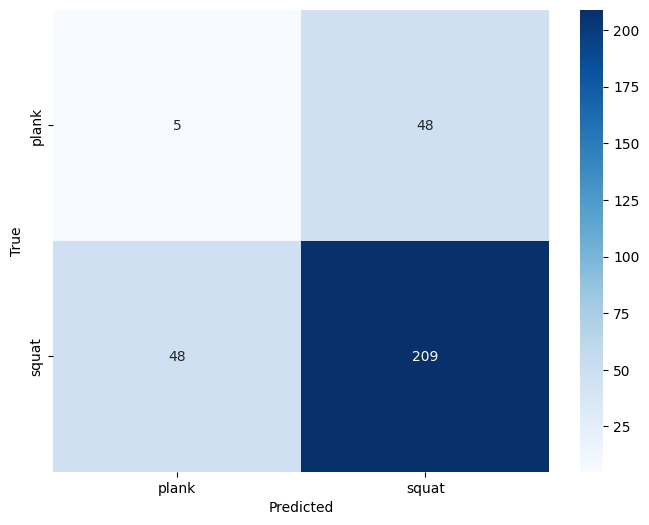

              precision    recall  f1-score   support

       plank       0.09      0.09      0.09        53
       squat       0.81      0.81      0.81       257

    accuracy                           0.69       310
   macro avg       0.45      0.45      0.45       310
weighted avg       0.69      0.69      0.69       310



In [8]:
# 검증 데이터셋에서 라벨을 얻습니다
true_labels = val_data.classes

# 검증 데이터셋에서 예측을 수행합니다
predictions = model.predict(val_data)
pred_labels = np.argmax(predictions, axis=1)

# Confusion Matrix를 생성합니다
conf_mat = confusion_matrix(true_labels, pred_labels)

# Confusion Matrix를 시각화합니다
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices, yticklabels=val_data.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report를 생성합니다
print(classification_report(true_labels, pred_labels, target_names=val_data.class_indices))


10/10 [==============================] - 2s 165ms/step


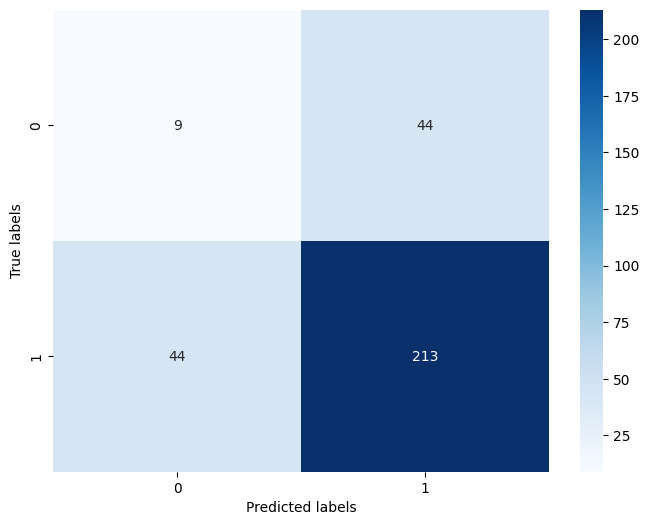

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17        53
           1       0.83      0.83      0.83       257

    accuracy                           0.72       310
   macro avg       0.50      0.50      0.50       310
weighted avg       0.72      0.72      0.72       310



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 검증 데이터 세트에서 true labels와 predicted labels를 가져옵니다.
y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=-1)

# Confusion matrix와 classification report를 생성합니다.
conf_mat = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Confusion matrix를 heatmap으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report를 출력합니다.
print('Classification Report:')
print(class_report)
